In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

# 1) Reading the data from a CSV file

In [2]:
df= pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

           ...           RelationshipSatisfaction StandardHours  \
0          ...                                  1            80   
1          ...                                  4            80   
2          ...                                  2            80   
3          ...                                  3            80   
4          ...                                  4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel          ...           RelationshipSatisfaction  \
count  1470.000000          ...                        1470.000000   
mean      2.063946          ...                           2.712245   
std       1.106940          ...                           1.081209   
min       1.000000          ...                           1.000000   
25%       1.000000          ...                           2.000000   
50%       2.000000          ...                           3.000000   
75%       3.000000          ...                           4.000000   
max       5.000000          ...                           4.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         1470.0       1470.000000        1470.000000   
mean            80.0          0.793878          11.279592   
std              0.0          0.852077           7.780782   
min             80.0          0.000000           0.000000   
25%             80.0          0.000000           6.000000   
50%             80.0          1.000000          10.000000   
75%             80.0          1.000000          15.000000   
max             80.0          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 26 columns]

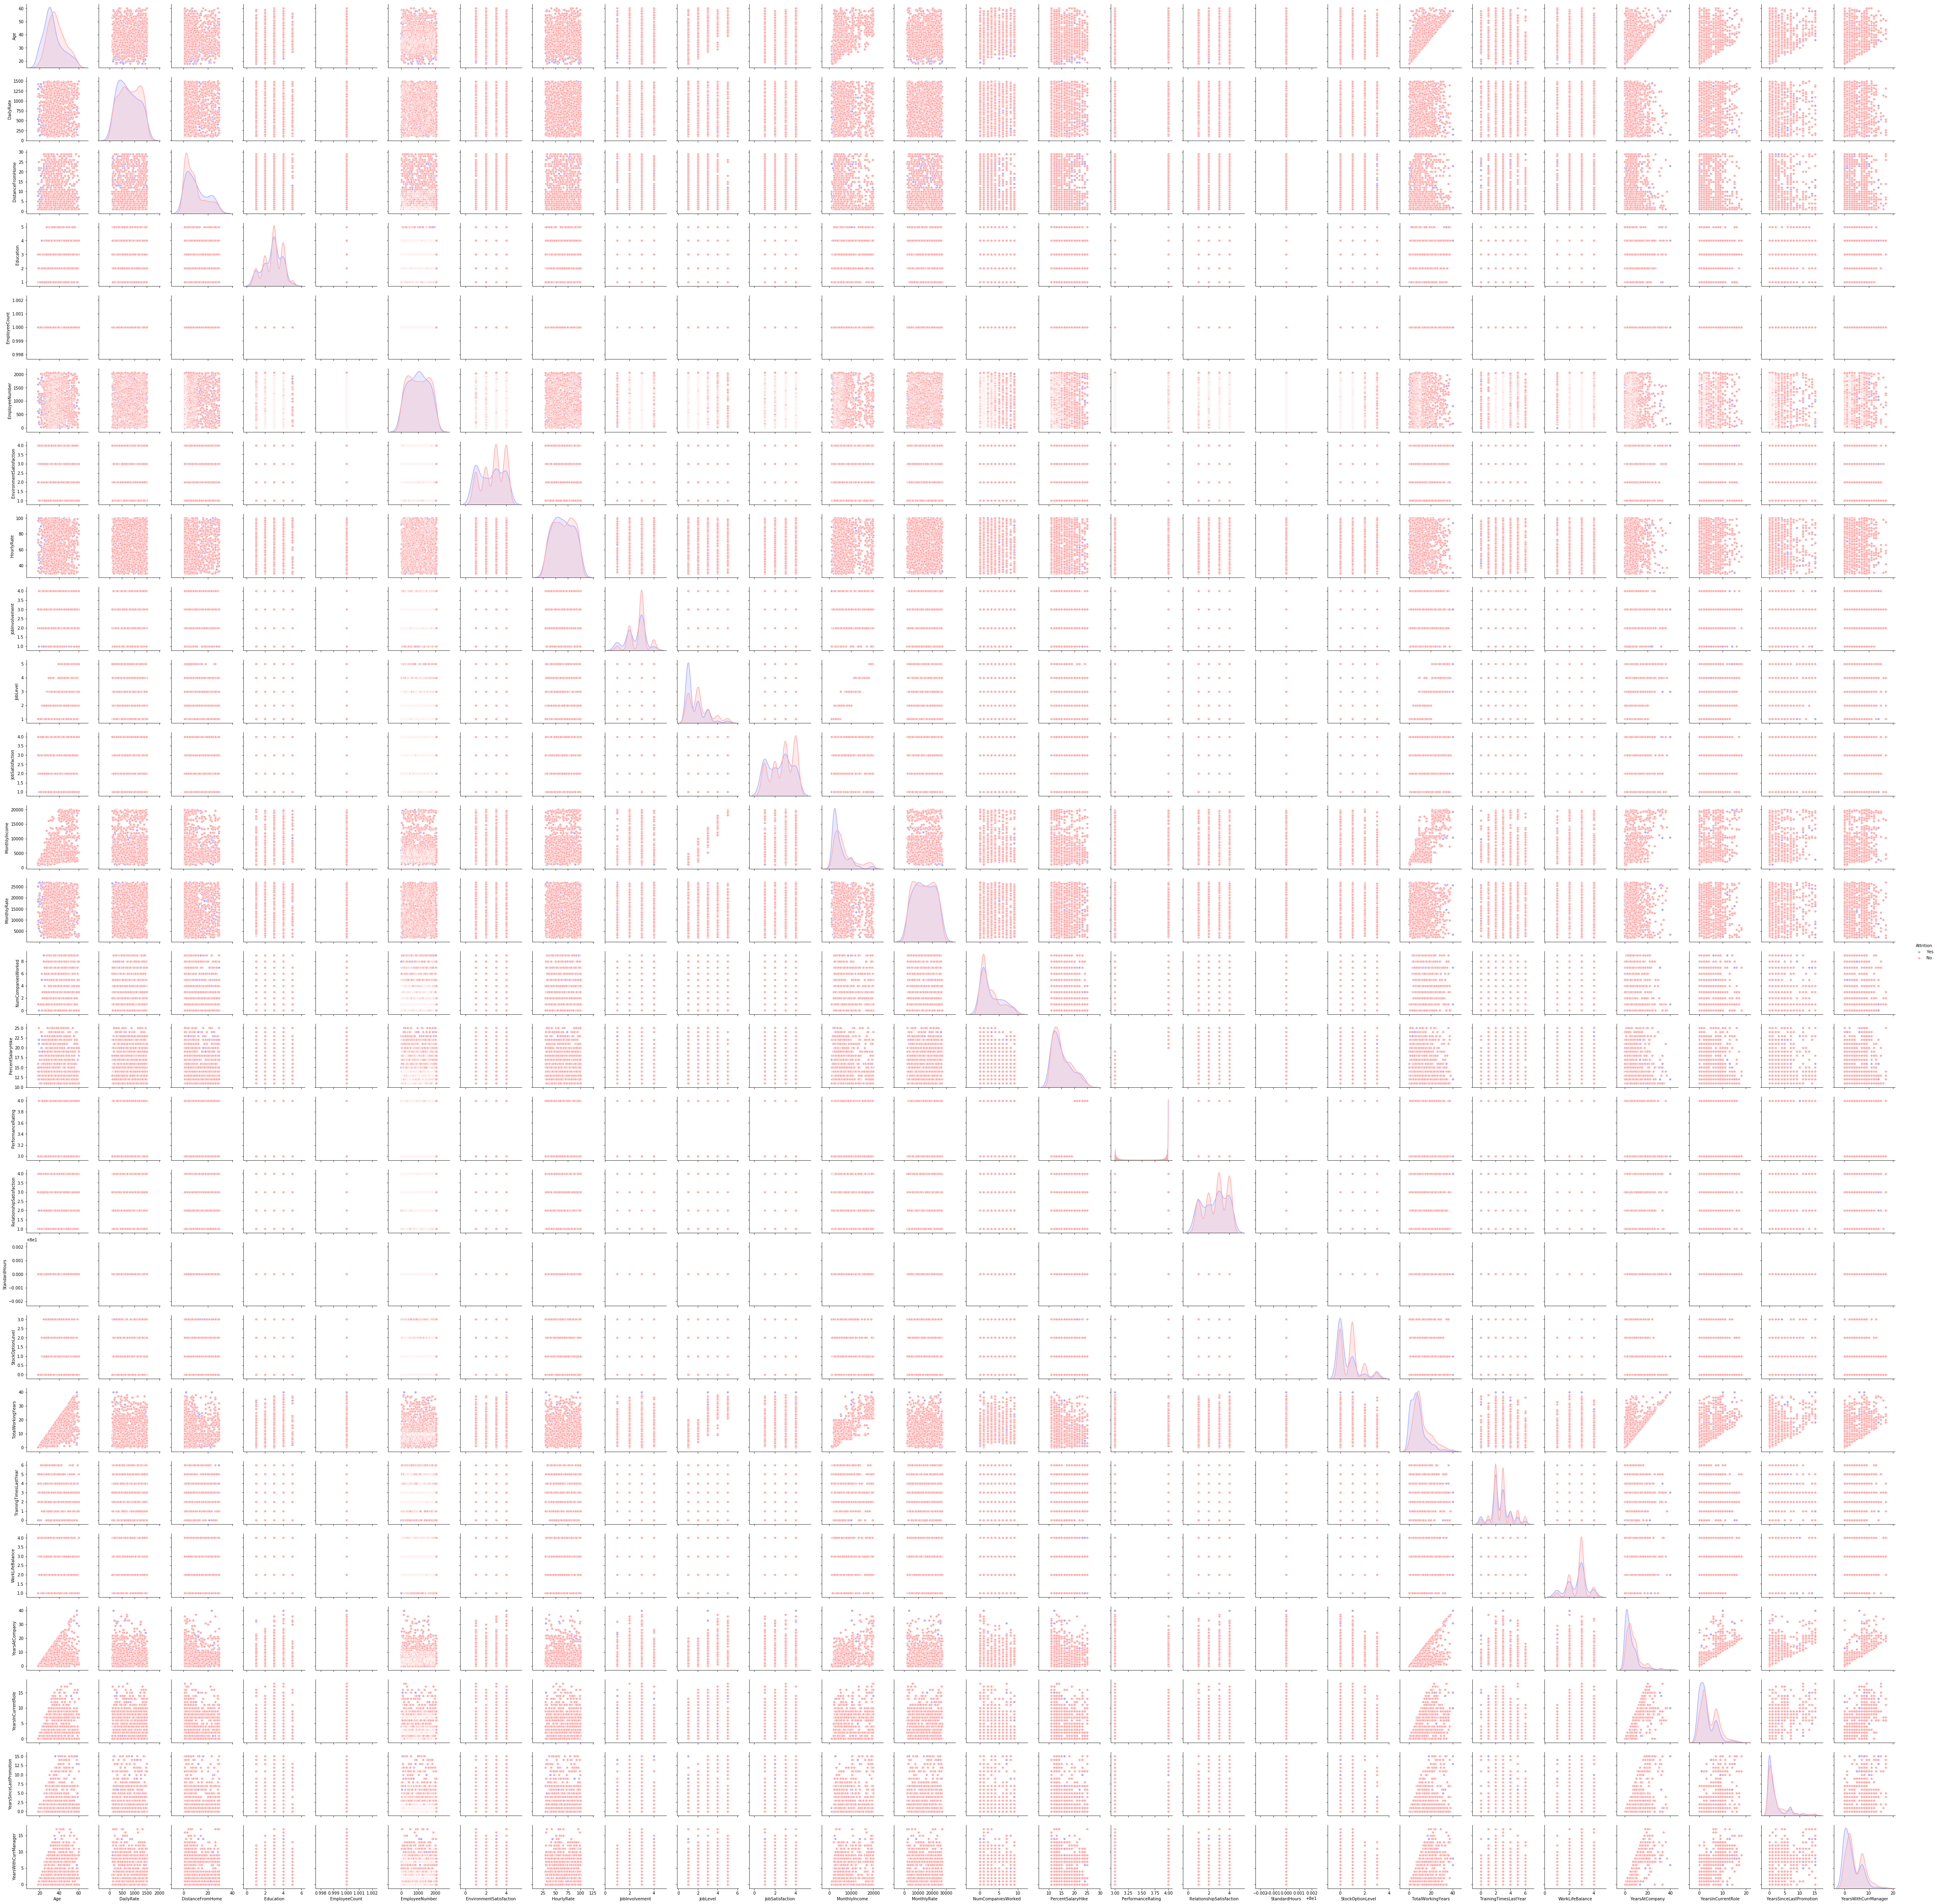

In [8]:
sns.pairplot(df,hue='Attrition',palette='bwr')

Text(0.5, 0, 'Age')

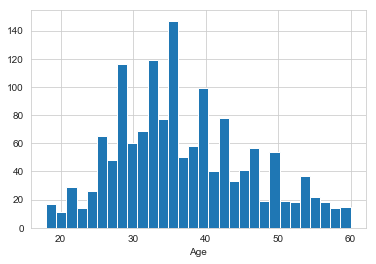

In [9]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

In [10]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

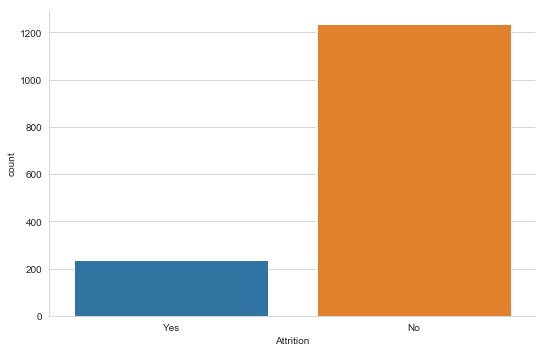

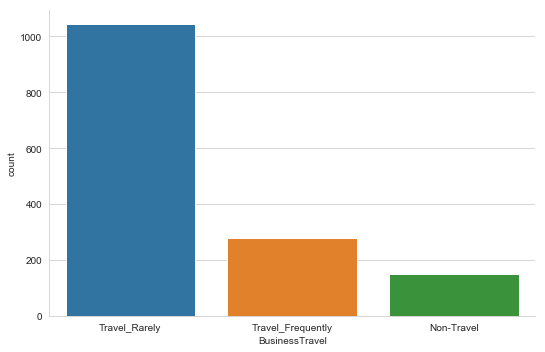

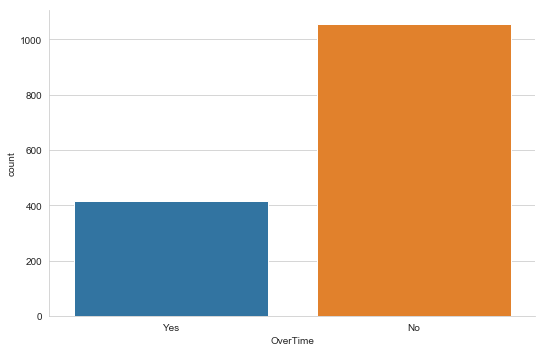

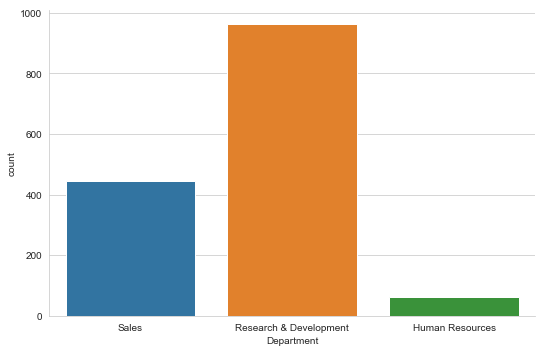

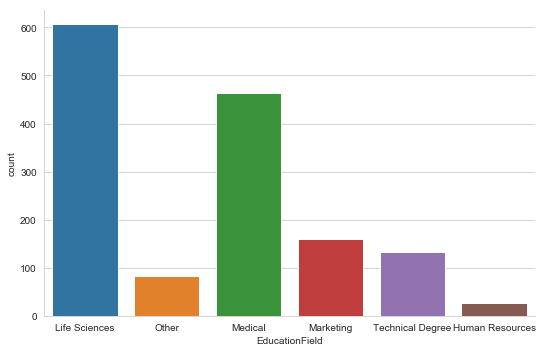

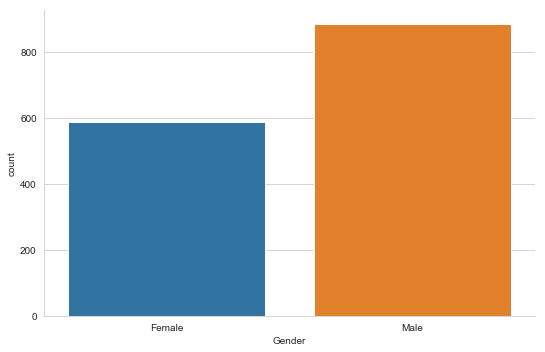

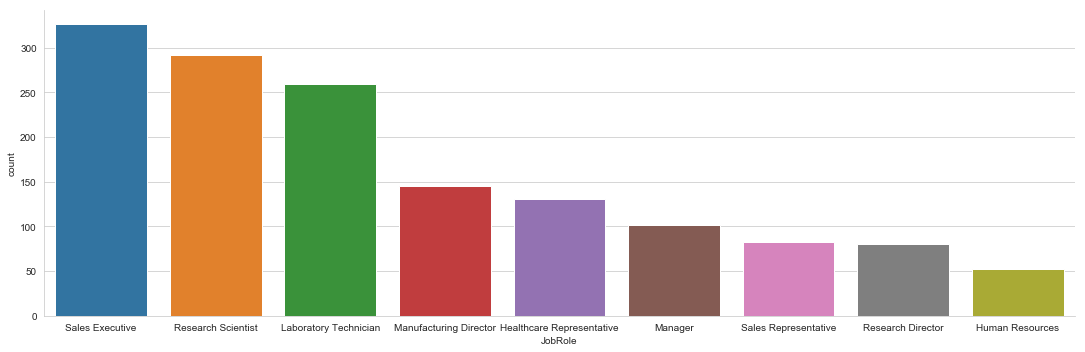

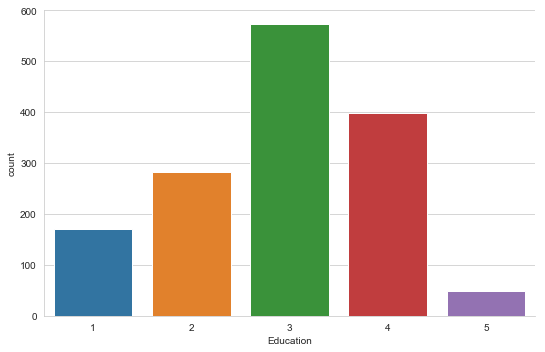

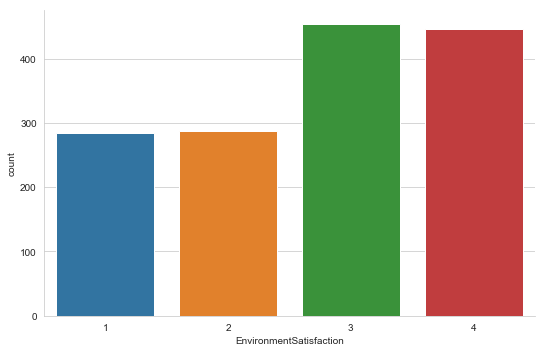

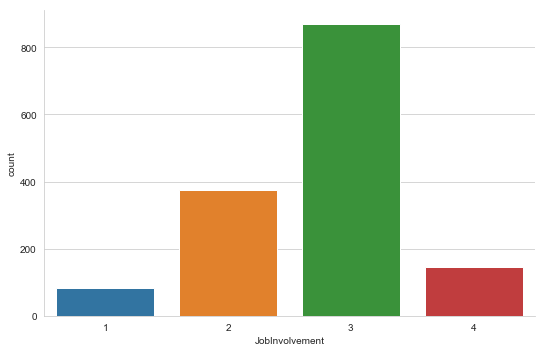

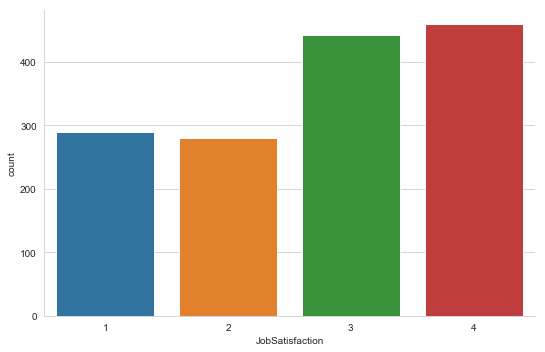

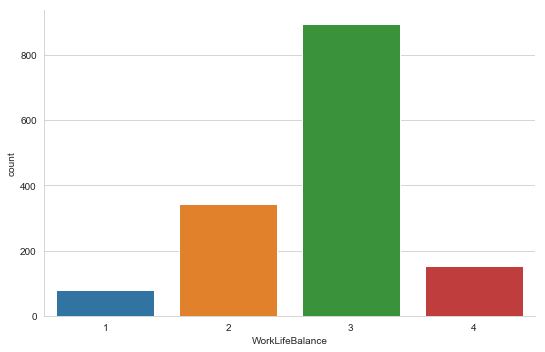

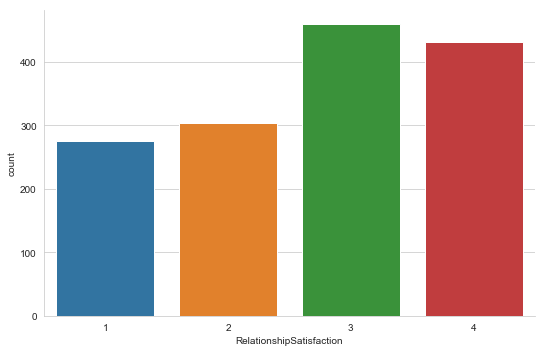

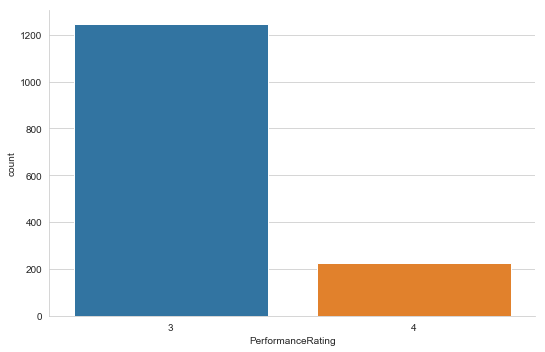

In [11]:
plot_all=['Attrition','BusinessTravel','OverTime','Department','EducationField','Gender','JobRole','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in plot_all:
     plot_cat(i)

# 2) Corelation b/w Features

In [12]:
df.corr().head(20)

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EmployeeCount                                 NaN         NaN             NaN   
EmployeeNumber                           0.017621    0.035179       -0.006888   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked

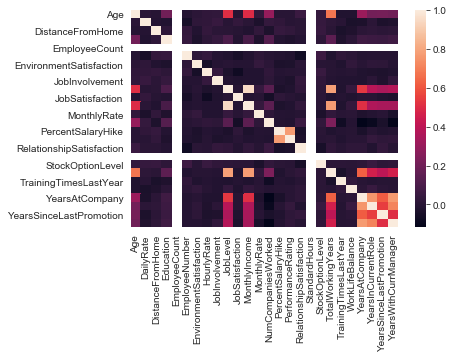

In [13]:
sns.heatmap(df.corr())

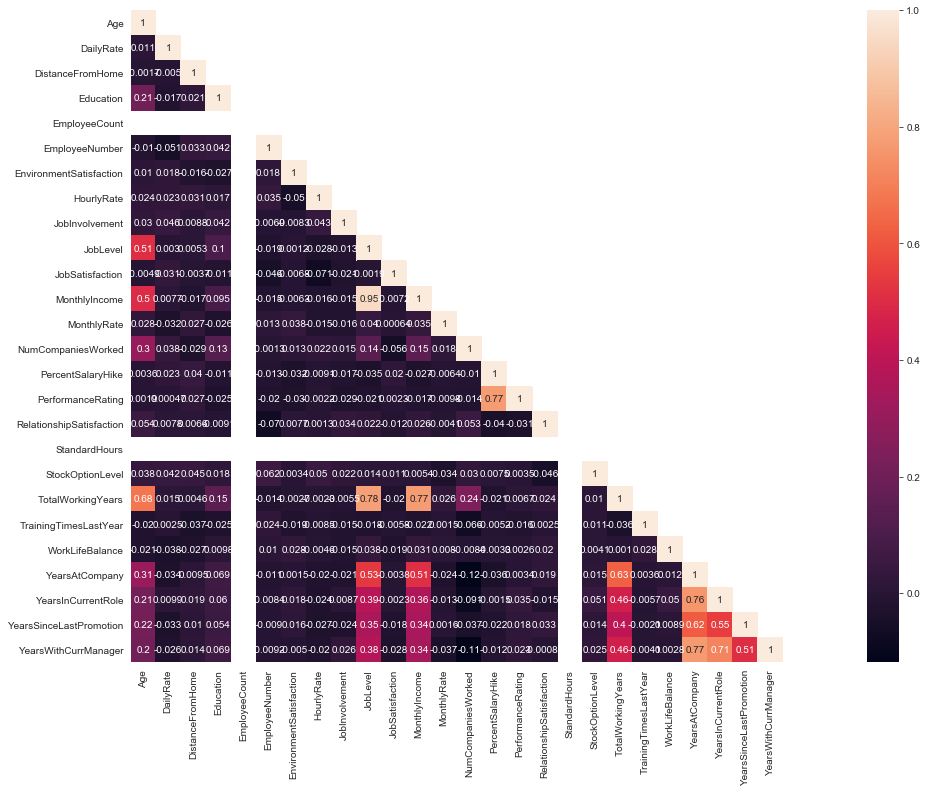

In [14]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# 3) Feature Selection

# 3.1 Plotting the Features against the 'Target' variable.

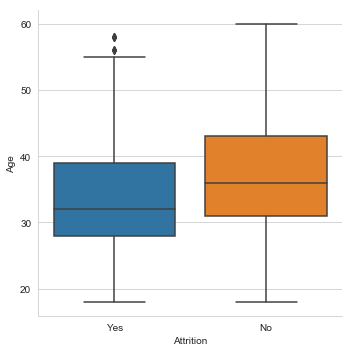

In [15]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

In [16]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

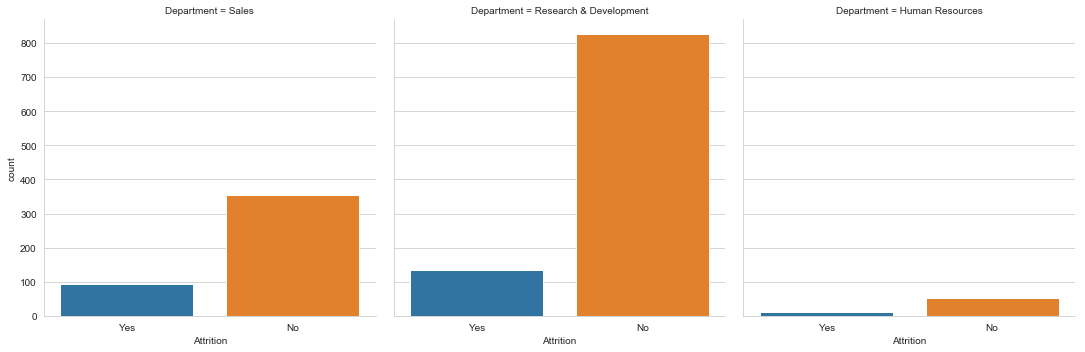

In [17]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [18]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
All                     0.838776  0.161224

In [19]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') 

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068
All        0.838776  0.161224

In [20]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') 

Attrition        No       Yes
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464
All        0.838776  0.161224

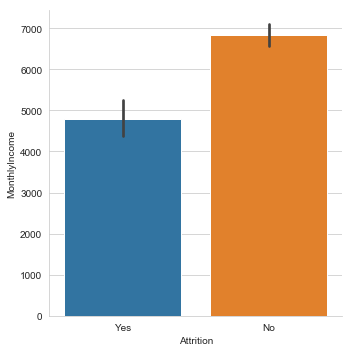

In [21]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

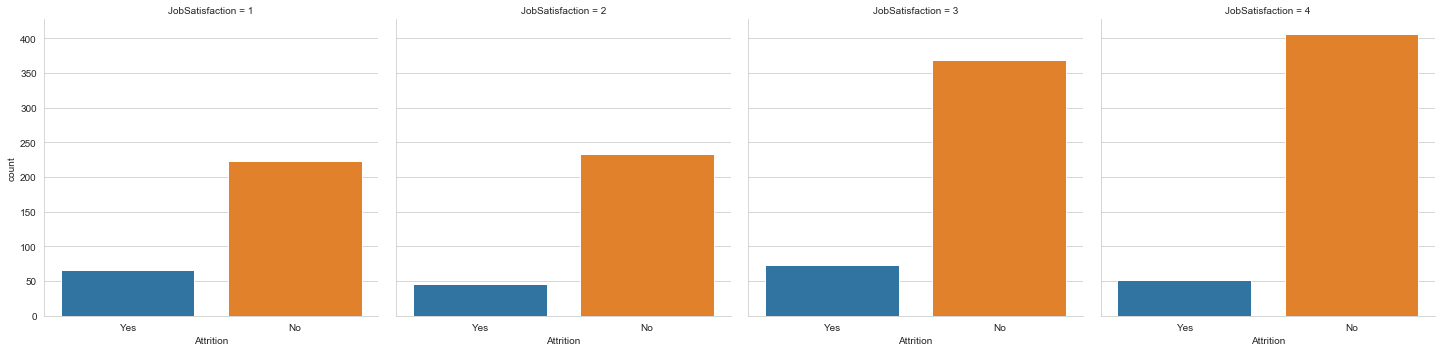

In [22]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [23]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') 

Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290
All              0.838776  0.161224

In [24]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529
All                      0.838776  0.161224

In [25]:
pd.crosstab(columns=[df.Attrition],index=[df.JobInvolvement],margins=True,normalize='index') 

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278
All             0.838776  0.161224

In [26]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') 

Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471
All              0.838776  0.161224

In [27]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') 

Attrition                       No       Yes
RelationshipSatisfaction                    
1                         0.793478  0.206522
2                         0.851485  0.148515
3                         0.845316  0.154684
4                         0.851852  0.148148
All                       0.838776  0.161224

# 3.2 Feature Selection

In [28]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

# 4) Preparing Dataset

# 4.1 Feature Encoding

In [29]:
def transform(feature):
    le=preprocessing.LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [30]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [31]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [32]:
df.head(50)

Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0    41          1           2                 1          2               1   
1    49          0           1                 8          1               1   
2    37          1           1                 2          2               4   
3    33          0           1                 3          4               1   
4    27          0           1                 2          1               3   
5    32          0           1                 2          2               1   
6    59          0           1                 3          3               3   
7    30          0           1                24          1               1   
8    38          0           1                23          3               1   
9    36          0           1                27          3               3   
10   35          0           1                16          3               3   
11   29          0           1                15          2               1   
12   31          0           1                26          1               1   
13   34          0           1                19          2               3   
14   28          1           1                24          3               1   
15   29          0           1                21          4               1   
16   32          0           1                 5          2               1   
17   22          0           1                16          2               3   
18   53          0           2                 2          4               1   
19   38          0           1                 2          3               1   
20   24          0           1                11          2               4   
21   36          1           2                 9          4               1   
22   34          0           1                 7          4               1   
23   21          0           1                15          2               1   
24   34          1           1                 6          1               3   
25   53          0           1                 5          3               4   
26   32          1           1                16          1               1   
27   42          0           2                 8          4               2   
28   44          0           1                 7          4               3   
29   46          0           2                 2          4               2   
30   33          0           1                 2          3               3   
31   44          0           1                10          4               4   
32   30          0           1                 9          2               3   
33   39          1           2                 5          3               5   
34   24          1           1                 1          3               3   
35   43          0           1                 2          2               3   
36   50          1           2                 3          2               2   
37   35          0           2                 2          3               2   
38   36          0           1                 5          4               1   
39   33          0           2                 1          3               1   
40   35          0           1                 4          2               4   
41   27          0           1                 2          4               1   
42   26          1           1                25          3               1   
43   27          0           2                 8          3               1   
44   30          0           1                 1          2               3   
45   41          1           1                12          3               5   
46   34          0           2                23          4               2   
47   37          0           1                19          2               1   
48   46          0           2                 5          4               2   
49   35          0           1                 8      

# 4.2 Feature Scaling

In [33]:
scaler=preprocessing.StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].as_matrix()

# 4.3 Splitting the data into training and validation sets

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# 5) Making predictions using different machine learning models

# 5.1 SVM

In [35]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
y_svmpred = classifier.predict(x_test)

In [37]:
cm = confusion_matrix(y_test, y_svmpred)

In [38]:
cm

array([[320,   0],
       [ 41,   7]], dtype=int64)

In [39]:
print(classification_report(y_test,y_svmpred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       320
           1       1.00      0.15      0.25        48

   micro avg       0.89      0.89      0.89       368
   macro avg       0.94      0.57      0.60       368
weighted avg       0.90      0.89      0.85       368



# 5.2 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
y_treepred = classifier.predict(x_test)

In [42]:
cm = confusion_matrix(y_test, y_treepred)

In [43]:
cm

array([[283,  37],
       [ 30,  18]], dtype=int64)

In [44]:
print(classification_report(y_test,y_treepred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       320
           1       0.33      0.38      0.35        48

   micro avg       0.82      0.82      0.82       368
   macro avg       0.62      0.63      0.62       368
weighted avg       0.83      0.82      0.82       368



# 5.3 Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
rfc_pred = rfc.predict(x_test)

In [47]:
cm = confusion_matrix(y_test, rfc_pred)

In [48]:
cm

array([[313,   7],
       [ 42,   6]], dtype=int64)

In [49]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.46      0.12      0.20        48

   micro avg       0.87      0.87      0.87       368
   macro avg       0.67      0.55      0.56       368
weighted avg       0.83      0.87      0.83       368



# 5.4 Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions = logmodel.predict(x_test)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.63      0.25      0.36        48

   micro avg       0.88      0.88      0.88       368
   macro avg       0.76      0.61      0.65       368
weighted avg       0.86      0.88      0.86       368



# 6) Conclusions
Hence we have completed the analysis of the data and also made predictions using different machine learning models